## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. The task is to identify the segments based on credit card usage.



### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the data and performing EDA. 

### Read and view the dataset

In [2]:
data_df = pd.read_csv("bank_marketing_part1_Data-1.csv")

In [3]:
#show first 5 rows of the dataset
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Data Description:

spending: Amount spent by the customer per month (in 1000s)
    
advance_payments: Amount paid by the customer in advance by cash (in 100s)
    
probability_of_full_payment: Probability of payment done in full by the customer to the bank
    
current_balance: Balance amount left in the account to make purchases (in 1000s)
    
credit_limit: Limit of the amount in credit card (10000s)
    
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [154]:
#check column names
data_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

### Basic Data Exploration

In [155]:
#know total number of entries in the data
data_df.count()

spending                        210
advance_payments                210
probability_of_full_payment     210
current_balance                 210
credit_limit                    210
min_payment_amt                 210
max_spent_in_single_shopping    210
dtype: int64

#### There are 210 customer bank details have been collected as sample. 

In [156]:
#know about the shape of data
data_df.shape

(210, 7)

#### The given dataset has 210 rows and 7 columns. 

In [157]:
#Check data types of attributes
data_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [158]:
#check information about the data
data_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### There is no null entry in the dataset and all the coloumns are of float type.

In [159]:
# Check for missing value in the dataset if any
data_df.isnull().sum().any()

False

In [160]:
# Checking summary statistic of dataset
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


#### The above output shows statistics summary of all numeric columns.

### Observation

Monthly spendings of customer ranges from 10k to 21k while average spending amount is 14k.
(k represents 1000 here)

Minimum amount paid in advance by customer is nearly 1200 and maximum is 1725 whereas  most of them pay nearly 1400 in advance.

On an average 87% of customers pay full amount to bank.

Maximum credit limit offered to customers by the bank is nearly 40k. 

Most of the customers spent 5400 at max for single shopping. 



In [161]:
#Checking for duplicates
data_df.duplicated().sum()

0

In [162]:
#Checking for unique values
data_df.nunique()

spending                        193
advance_payments                170
probability_of_full_payment     186
current_balance                 188
credit_limit                    184
min_payment_amt                 207
max_spent_in_single_shopping    148
dtype: int64

### EDA

### Univariate Analysis

Univariate analysis is the simplest analysis where the data is analyzed only on one variable.

The most common univariate analysis is checking the central tendency (mean, median and mode), the range, the maximum and minimum values, and standard deviation of a variable.

Common visual technique used for univariate analysis is a histogram, which is a frequency distribution graph.

A box plot can also be used to compare the spread of the variables and provides an insight into outliers.

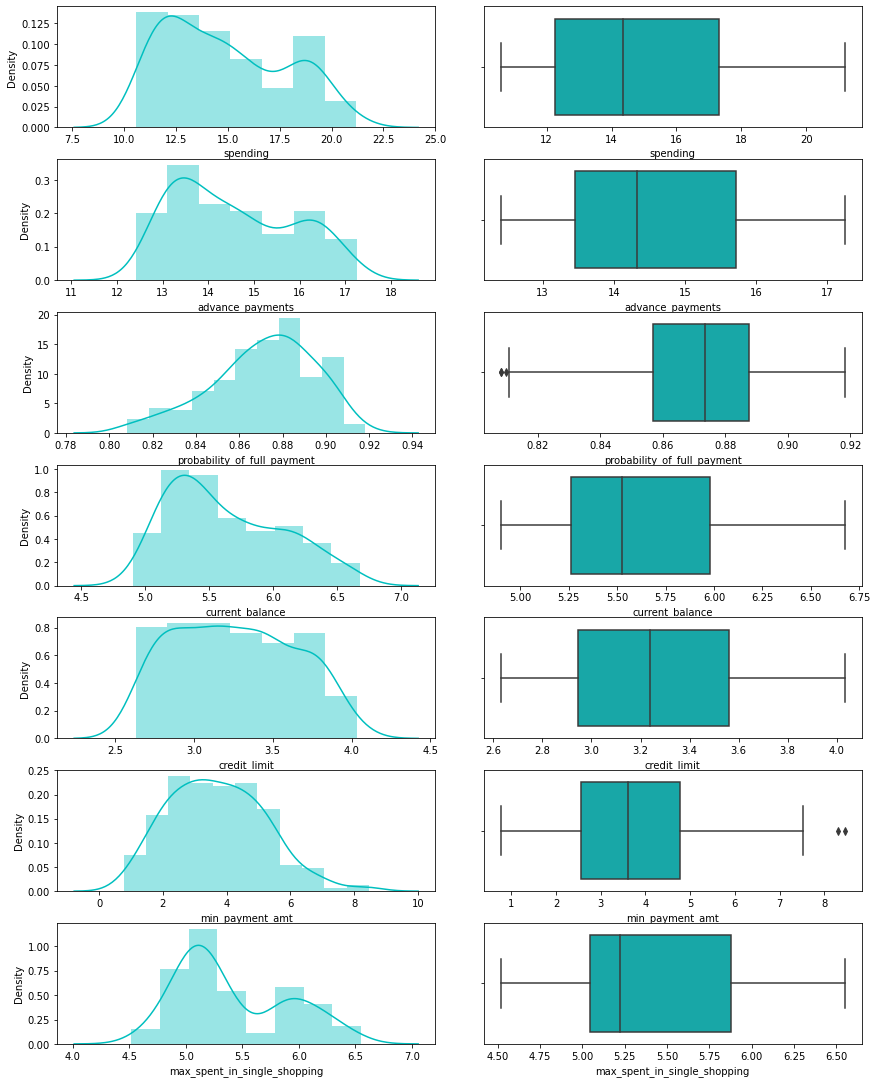

In [163]:
fig,ax = plt.subplots(nrows=7, ncols=2, figsize= (12,15))
fig.tight_layout()

sns.distplot(data_df['spending'], ax = ax[0][0],color='c')
sns.boxplot(data_df['spending'], ax = ax[0][1],color='c')


sns.distplot(data_df['advance_payments'], ax = ax[1][0],color='c')
sns.boxplot(data_df['advance_payments'], ax = ax[1][1],color='c')


sns.distplot(data_df['probability_of_full_payment'], ax = ax[2][0],color='c')
sns.boxplot(data_df['probability_of_full_payment'], ax = ax[2][1],color='c')


sns.distplot(data_df['current_balance'], ax = ax[3][0],color='c')
sns.boxplot(data_df['current_balance'], ax = ax[3][1],color='c');

sns.distplot(data_df['credit_limit'], ax = ax[4][0],color='c')
sns.boxplot(data_df['credit_limit'], ax = ax[4][1],color='c');

sns.distplot(data_df['min_payment_amt'], ax = ax[5][0],color='c')
sns.boxplot(data_df['min_payment_amt'], ax = ax[5][1],color='c');

sns.distplot(data_df['max_spent_in_single_shopping'], ax = ax[6][0],color='c')
sns.boxplot(data_df['max_spent_in_single_shopping'], ax = ax[6][1],color='c');

### Observation

- Monthly spendings of customer ranges from 10k to 21k while average spending amount is 14k.(k represents 1000 here)

- Minimum amount paid in advance by customer is nearly 1200 and maximum is 1725 whereas most of them pay nearly 1400 in advance.

- On an average 87% of customers pay full amount to bank.

- Maximum credit limit offered to customers by the bank is nearly 40k.

- Most of the customers spent 5400 at max for single shopping.

#### Looking at the box plot, it seems that only two variables probability_of_full_payment and minimum_payment_amount have outlier present.

### Bivariate Analysis

Bivariate analysis is where you are comparing two variables to study their relationships. These variables could be dependent or independent to each other. In Bivariate analysis is that there is always a Y-value for each X-value.

The most common visual technique for bivariate analysis is a scatter plot, where one variable is on the x-axis and the other on the y-axis. 

In [164]:
#checking correlation between variables
corr=data_df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


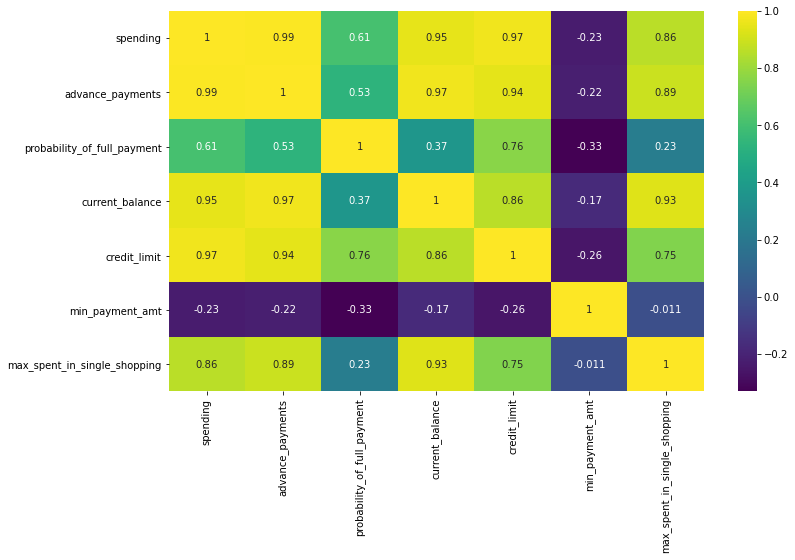

In [165]:
plt.figure(figsize=(12,7))
sns.heatmap(data_df.corr(),annot=True,cmap='viridis')
plt.show()

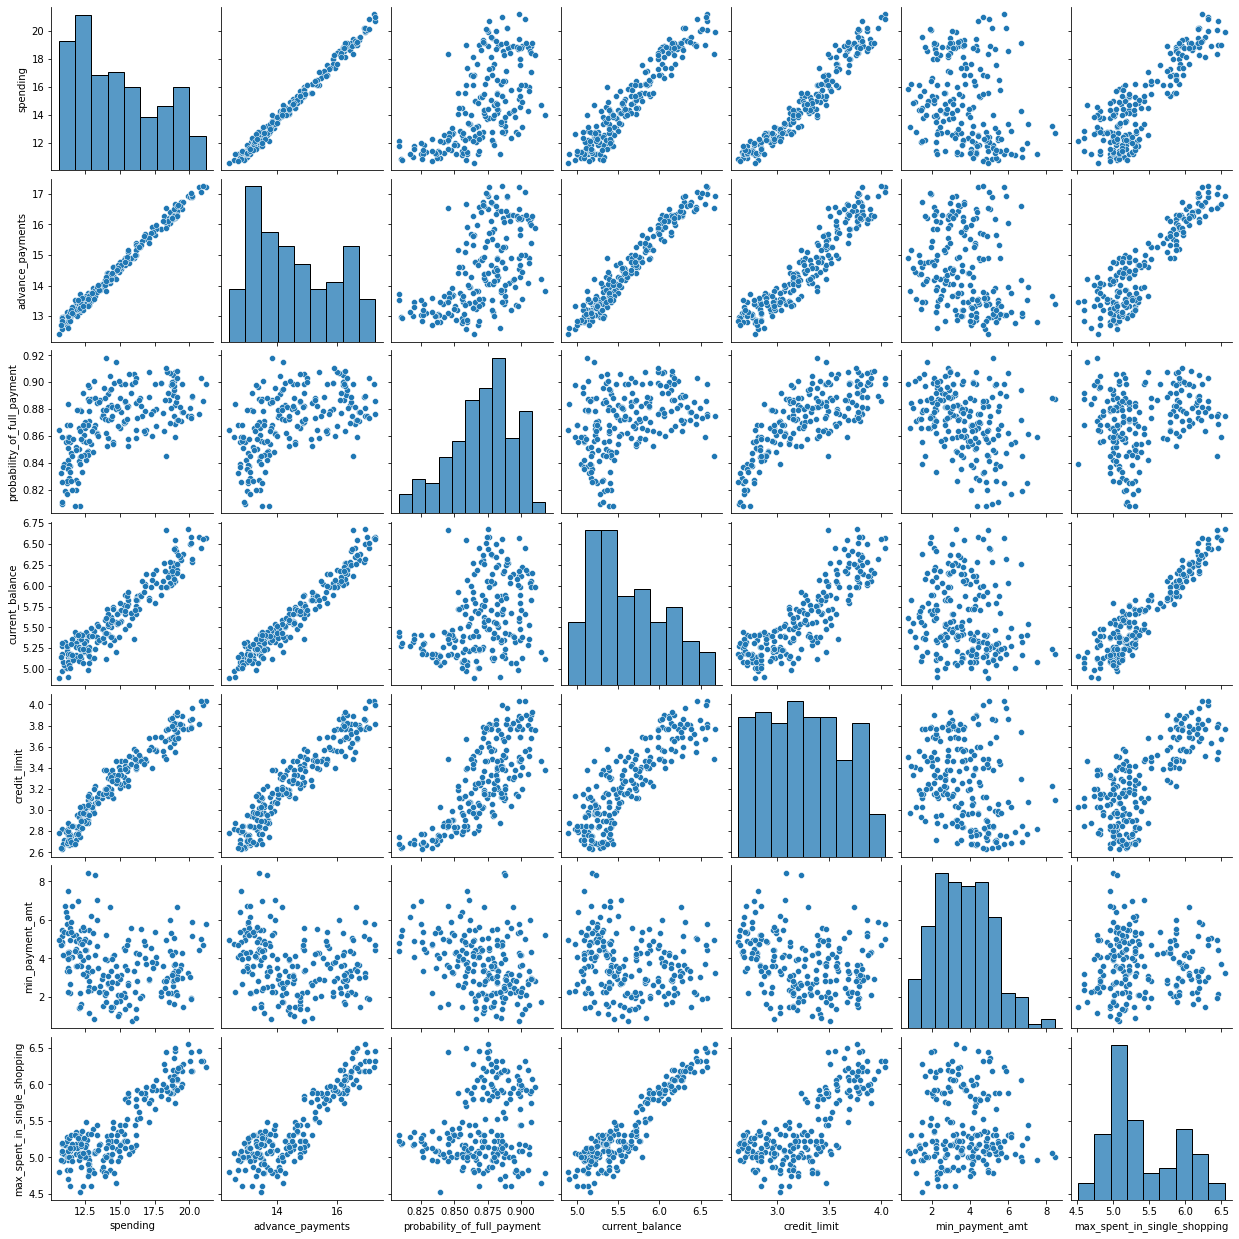

In [166]:
sns.pairplot(data_df)
plt.show()


#### Observations

- Monthly spending of the customer and his payment to the bank in advance are highly correlated.

- Spending of customer depends on his current balance and based on that only the credit limit is offered to the customer.

- Advance payment done by the customer is highly correleted with current balance and by seeing this credit limit is offered.

- The customer have more current balance spends more amount in single shopping. 

### Scaling is necessary in this case.

Standardization(sometimes called data normalization or feature scaling) refers to the process of rescaling the values of the variables in the data set so that they share a common scale.

Standardization helps to make the relative weight of each variable equal by converting each variable to a unitless measure or relative distance.

Distance based algorithms are affected by the scale of the variables.This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.To overcome this problem,all the variables can bring down to the same scale before clustering. 

As from the data description it can be seen **advance payments and minimum payment amount by customer** are in terms of <span style='background :yellow' > 100s </span> whereas **monthly spending of customer ,current balance of the customer in the bank and maximum spending amount by customer in single shopping** are in terms of <span style='background :yellow' > thousands </span>. The **credit limit** is in terms of <span style='background :yellow' > 10000s </span>. There is very much variations in the dataset.

Hence scaling is necessary.

standard scaler is used here which computes the z-score value of each value of every column with mean 0 and standard deviation 1.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#Apply standardscalar
X = StandardScaler()

In [6]:
scaled = X.fit_transform(data_df)

In [7]:
#convert scaled array into a dataframe
scaled_df=pd.DataFrame(scaled)

In [8]:
#extract columns of original dataframe
columns=data_df.columns

In [9]:
#set columns of scaled dataframe
scaled_df.columns=columns

In [10]:
#check statistical summary of scaled data
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.260896e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.358702e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.790757e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.418946e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


In [174]:
#checking variance before scaling
data_df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

In [175]:
#checking variance after scaling
scaled_df.var()

spending                        1.004785
advance_payments                1.004785
probability_of_full_payment     1.004785
current_balance                 1.004785
credit_limit                    1.004785
min_payment_amt                 1.004785
max_spent_in_single_shopping    1.004785
dtype: float64

#### Observartion
- It is observed from above outputs is after scaling the original dataset mean is centered to zero in all case.
- Standard deviation of each column is set to 1.And so as the variance.

## Applying hierarchical clustering to the scaled data. Identifying  number of optimum clusters using Dendrogram.

### Creating the Dendrogram



### Importing dendrogram and linkage module

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

Two functions have been imported from hierarchy submodule :- dendogram is for visualization and linkage is for computation of distances and merge of clusters.

### Choosing 'ward' linkage method

Ward´s Linkage:

Ward´s linkage is a method for hierarchical cluster analysis.The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster. Ward´s Method seeks to choose the successive clustering steps so as to minimize the increase in ESS at each step.

In [12]:
wardlink = linkage(scaled_df, method = 'average')

Text(0.5, 1.0, 'Dendrogram')

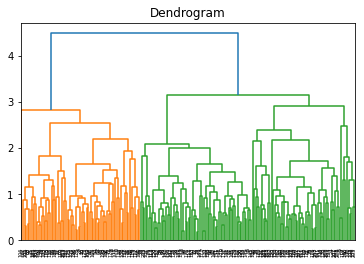

In [13]:
dend = dendrogram(wardlink)
plt.title('Dendrogram')

### Cutting the Dendrogram with suitable clusters

More the distance of the vertical lines in the dendrogram, more the distance between those clusters.The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold distance.
 
It can be visualize from the dendrogram that the blue line has more distance hence it can be cut with threshold distance 3.5(assumed here).

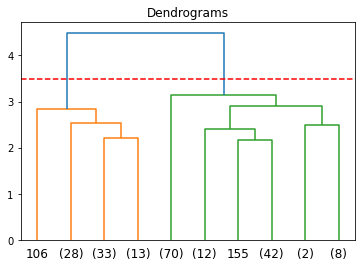

In [14]:
plt.title("Dendrograms")
dend = dendrogram(wardlink,
                 truncate_mode='lastp', #lastp shows last p clusters that are merged
                 p = 10, #shows last 10 clusters
                 )
plt.axhline(y=3.5, color='r', linestyle='--')

### Importing fcluster module to create clusters

In [15]:
from scipy.cluster.hierarchy import fcluster

In [16]:
# Set criterion as maxclust,then create 2 clusters, and store the result in another object 'clusters'

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1], dtype=int32)

### Appending clusters to original dataset

In [17]:
#Appending clusters to original dataset
data_df['clusters'] = clusters

In [19]:
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


### Cluster Frequency

In [20]:
data_df.clusters.value_counts().sort_index()

1     75
2    135
Name: clusters, dtype: int64

In [21]:
aggdata=data_df.groupby('clusters').mean()
aggdata['Freq']=data_df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.12920,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,13.02437,13.726667,0.865112,5.346748,3.042207,3.727979,5.086422,135


- Cluster 1: Targeted customers to give promotional offer(High credit limit,high monthly spending,have good current balance in bank,spends a good amount in single shopping)
- Cluster 2: Least targeted customers (Less monthly spending,customers have less current balance,less credit limit offered to this category)


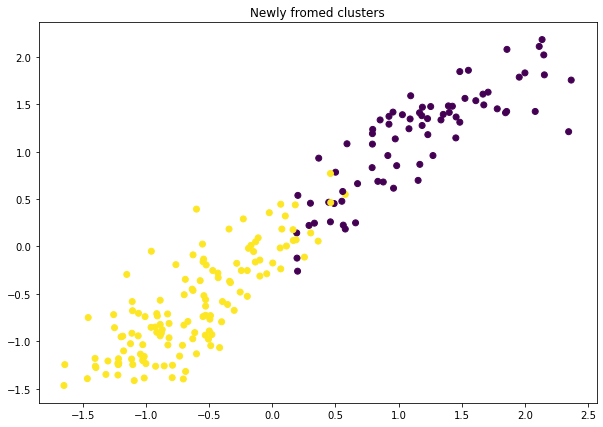

In [186]:
plt.figure(figsize=(10, 7))  
plt.title('Newly fromed clusters')
plt.scatter(scaled_df['current_balance'],scaled_df['spending'], c=clusters) 

The above plot clearly visualize two clusters with two different color.
- Black colored dots shows cluster 1(Targeted customers)
- Yellow colored dots shows cluster 2(Least targeted customers)

## Applying K-Means clustering on scaled data and finding optimum clusters. 

### Creating Clusters using KMeans

### Forming clusters with K = 1 and comparing the WSS

In [22]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

### Forming 2 Clusters with K=2

In [23]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [24]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [25]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

### Within Cluster Sum of Squares

In [26]:
k_means.inertia_

659.171754487041

### Forming clusters with K = 3,4,5,6 and comparing t

In [192]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [193]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

371.38509060801096

In [194]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

327.21278165661346

In [195]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

289.31599538959495

### WSS reduces as K keeps increasing

## Elbow criterion for finding optimum number of clusters

#### One of the methods for finding out the optimum number of clusters for K-Means algorithm is the elbow criterion.



**A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.**

**visualizing the data alone cannot always give the right optimal number of clusters.Hence it can be demonstrated as the following steps.**

**The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k the within-Cluster Sum of Square (WSS) has to be calculated.WCSS is the sum of squared distance between each point and the centroid in a cluster. Then, a line chart of the WSS can be plotted for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.**

**As the number of clusters increases, the WSS value will start to decrease. WSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.**

**The idea is to define clusters such that the total intra-cluster variation (or total within-cluster sum of square (WSS)) is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.**

**<span style='background :yellow' > So the goal is to choose a small value of k that still has a low WSS </span>**, **and the elbow usually represents where it starts to have diminishing returns by increasing k.**



### Calculating WSS for other values of K - Elbow Method

In [27]:
wss =[]

In [28]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [29]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694]

In [30]:
a=[1,2,3,4,5,6,7,8,9,10]

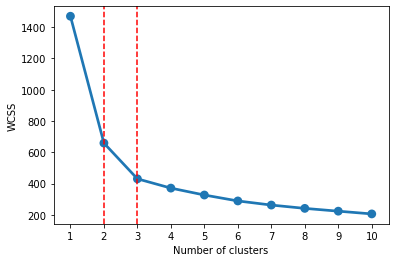

In [31]:
sns.pointplot(a, wss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=1, color='r', linestyle='--')
plt.axvline(x=2, color='r', linestyle='--')

As it can seen from the above plot, 2 and 3 both looks like elbow.

The elbow criterion doesn't always work well.

In that case silhouette score method can be tried for determining the optimal k.

In [201]:
#plt.plot(range(1,11), wss)

## Silhouette score

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b), where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

It helps define K in Kmeans that helps in getting the optimal number of clusters and it is used to measure the goodness of cluster.

### KMeans with K=2

In [32]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

#### Cluster evaluation for 2clusters: the silhouette score

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [34]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.46577247686580914

### KMeans with K=3

In [205]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

#### Cluster evaluation for 3 clusters: the silhouette score

In [206]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [207]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4007270552751299

## silhouette score is better for 2 clusters than for 3 clusters. So, final clusters will be 2.



In [39]:
#Appending cluster labels obtained from K-means clustering into the original data frame.
data_df["kmeans"] = labels
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


## Describing cluster profiles for the clusters defined.

### Cluster Profiling

In [41]:
data_df.kmeans.value_counts().sort_index()

0    133
1     77
Name: kmeans, dtype: int64

In [44]:
clust_profile=data_df.groupby('kmeans').mean()
clust_profile['freq']=data_df.kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,freq
kmeans,,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,1.969925,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,1.077922,77


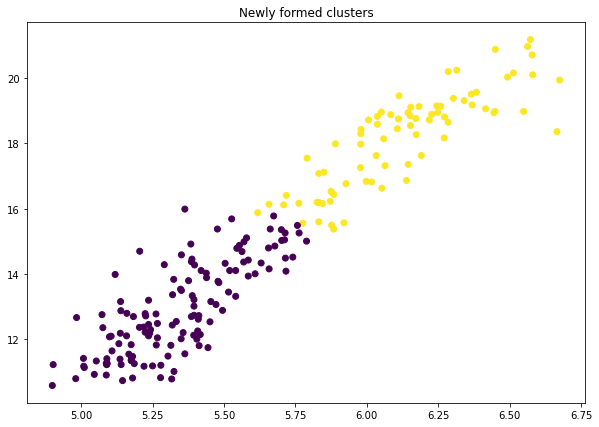

In [216]:
plt.figure(figsize=(10, 7))  
plt.title('Newly formed clusters')
plt.scatter(data_df['current_balance'],data_df['spending'], c=k_means.labels_) 

- Black colored dots shows cluster 0(Least Targeted customers with comparitively less spending and and less current balance)
- Yellow colored dots shows cluster 1(<span style='background :yellow' >Targeted customers </span>) with high current balance and high spending.

## Some Recommendations

1. Cluster 1 customers have high monthly spending with high current balance.They spent more amount in a single shopping and they pay to the bank in advance also. Hence more promotional offers can be given to motivate them for larger purchases and to make it more often.

2. Cashback offers can be given to cluster 1 customers to propel for frequent purchase.

3. Cluster 2 customers have comparatively less current balance but with a minimum difference. The spending is also less. But minimum amount of payment paid to the bank monthly for purcahse is more here.Hence suitable offers , based on their purchase history,can be given to attract for more purchases. 

4. More incentives to be given to cluster 2 customers to encourage them to spend more and frequently.

5. Some offers can be given to cluster 2 customers which encourage them to do advance payment.